# Eligibility of Governor's fund for Redmond Police Department

## Introduction

In this project we are using Monte Carlo simulation on linear regression model to determine if given police department is eligible for governor office funding or not.

Given are data (from cleaned data) in _incidents_ and _police_ vector. _incidents_ denotes number of crimes while _police_ denotes number of police officers per crime.

In [196]:
incidents<-c(1,31,35,37,38,39,41,44,44,52,53,60,60,62,64,83,86,91,125)
police<-c(1,72,68,86,72,76,77,82,76,96,117,121,124,120,131,158,158,176,165)

Passing through linear model.

In [197]:
lm(police ~ incidents)


Call:
lm(formula = police ~ incidents)

Coefficients:
(Intercept)    incidents  
     21.914        1.491  


Plotting the given data to check for linearity.

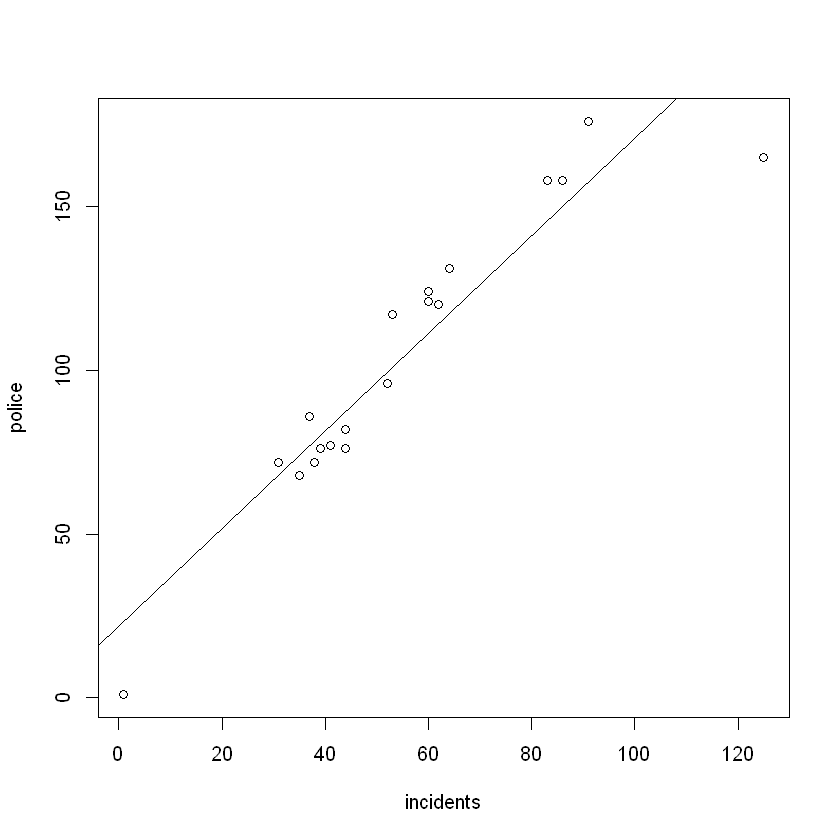

In [198]:
plot(police~incidents)
abline(lm(police~incidents))

Checking if the rate of police officers per incidents follow normal distribution or not.

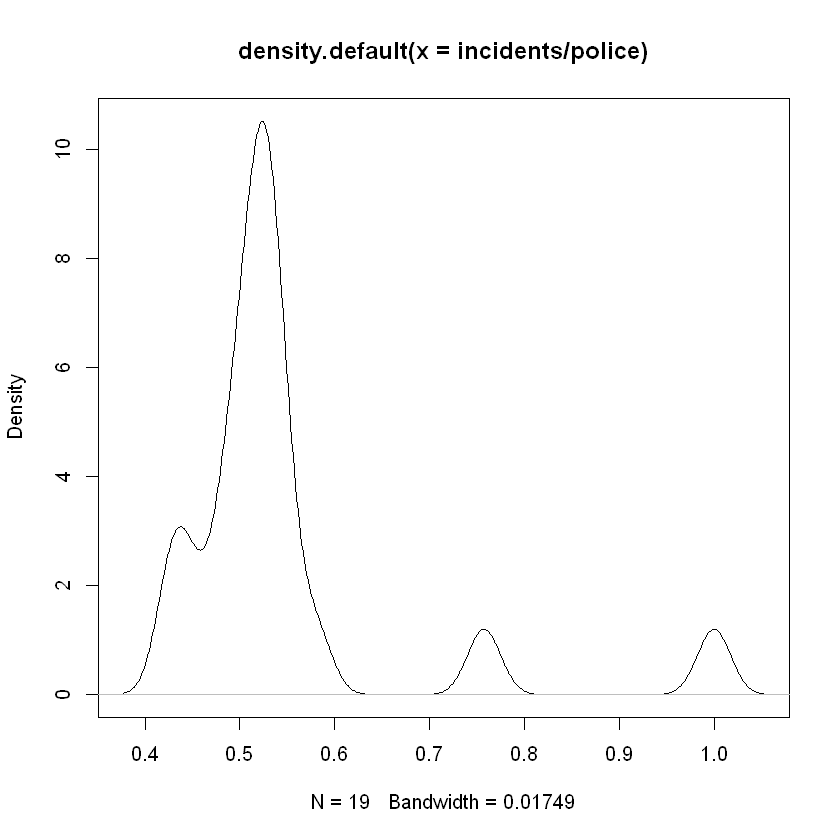

In [199]:
plot(density(incidents/police))

The distribution or rate of police offers per incidents is mostly normal (the big bell curve in the middle- but there are other data which affects its shape (the small curve). So we will try to clean it by removing outliers like: (1,1) and (125, 165).

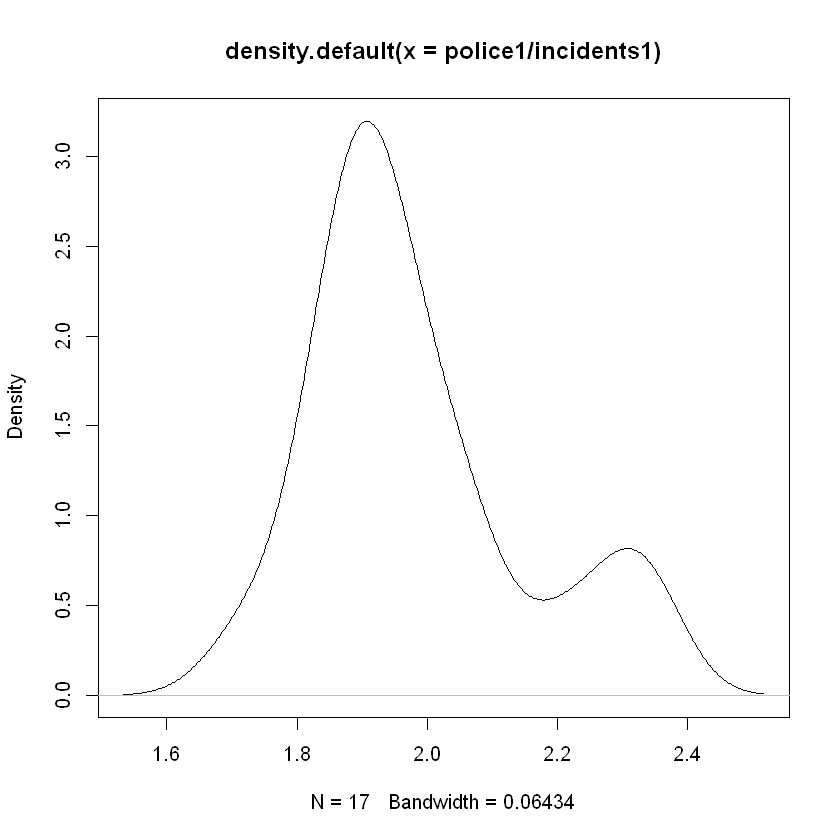

In [213]:
#cleaning off outliers 
incidents1<-c(31,35,37,38,39,41,44,44,52,53,60,60,62,64,83,86,91)
police1<-c(72,68,86,72,76,77,82,76,96,117,121,124,120,131,158,158,176)
plot(density(police1/incidents1))

The above curve is closer to normal distribution. We leave it to that.

Mean and Standard deviation of number of incidents:

In [201]:
mean(incidents1)
sd(incidents1)

[1] 54.11765

[1] 18.54684

Mean and Standard deviation of number of police officers:

In [202]:
mean(police1)
sd(police1)

[1] 106.4706

[1] 34.70252

Simulating the data N times to get number of police officers per crime

In [207]:
N=1500
rate =matrix(ncol = N,nrow = 1)
for (i in 1:N) {
    incidents2<-rnorm(1, mean=mean(incidents1), sd=sd(incidents1)) #random number in the normal distribution of incidents1 around mean and standard deviation
    police2<-rnorm(1, mean=mean(police1), sd=sd(police1)) #random number in the normal distribution of police1 around mean and standard deviation
    rate[i]= as.vector(police2/incidents2)
}
rate

2.557628,3.195514,2.204987,1.536974,1.139262,3.092516,1.343301,2.543587,2.195453,3.795478,...,2.421966,1.301918,1.806238,2.454079,3.033959,3.357942,1.86094,0.6600612,7.453952,1.642632


Average value of all simulated values for response

In [208]:
mean(rate)

[1] 2.379532

Number of incidents where there were more than 1.5 police officers:

In [209]:
length(which(rate>2.5))

[1] 476

Probablity of having more than 1.5 police officers per crime:

In [212]:
p =length(which(rate>2.5))/N
p*100

[1] 31.73333

31.73% of time there are more than 2.5 police officers per crime. At this time, it is not a good probabilty to grant fund for this police department .Hence, there is no fund provided for this department this year.